In [1]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


### 1D - Pendulum animation

The animations below shows a pendulum that can swing in the x-directions only (1 dimension).

The left hand side shows an animation of the pendulum

The center shows two plots of the time evolution of the **position** and **velocity** vs **time**.

The right hand plot shows plots of the **position** vs **velocity** to make a _phase plot_.


The system is started at `t=0` with the pendulum pulled back to `x=-0.8` and released from a stationary start `vx=0`. 


In [7]:
import math
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation

from IPython.display import display, clear_output, HTML
from ipywidgets import Button, FloatSlider, VBox, HBox, Label


<IPython.core.display.Javascript object>


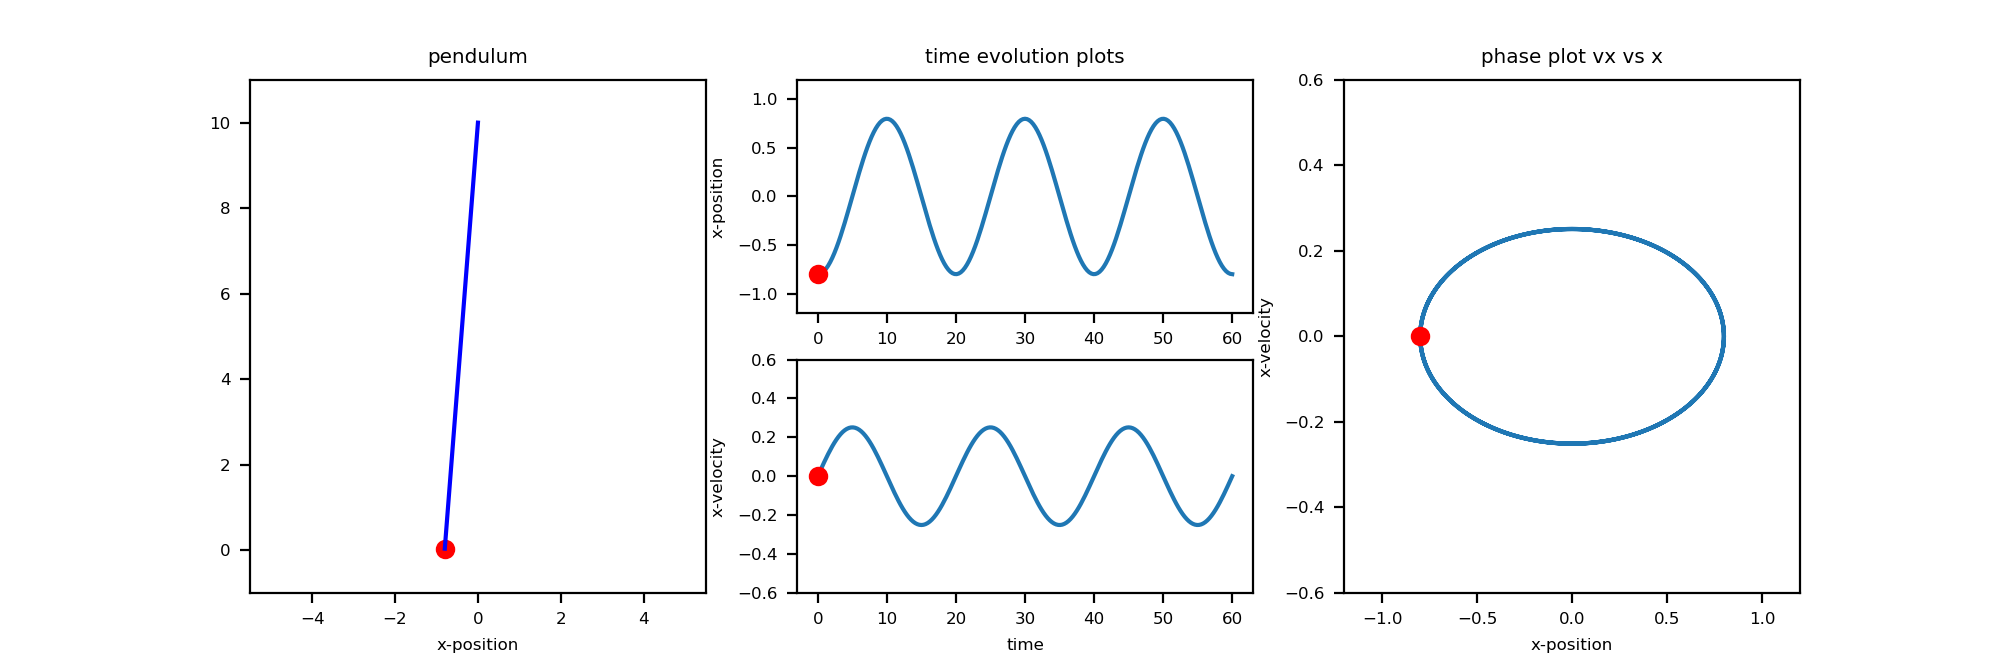

In [8]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 6})

x0 = -0.8
vx0 = 0

# Mathematically it can be shown that a pendulum
# follows sinusoidal motion with fixed period T.
# 
# general solution x = A*math.cos(2*math.pi*t/T + a)
#                  y = B*math.cos(2*math.pi*t/T + b)

length = 10

T = 20

A = (x0**2 + vx0**2)**0.5

if A != 0:
    a = math.acos(x0/A)
else:
    a = 0

t = np.linspace(0, 3*T, 201)
x = []
vx = []

for ti in t:
    xi = A*math.cos(2*math.pi*ti/T + a)
    vxi = -2*math.pi/T*A*math.sin(2*math.pi*ti/T + a)
    x.append(xi)
    vx.append(vxi)

fig1 = plt.figure(figsize=(10,3.33))

ax_p = fig1.add_subplot(1,3,1)
ax_x = fig1.add_subplot(2,3,2)
ax_vx = fig1.add_subplot(2,3,5)
ax_phase = fig1.add_subplot(1,3,3)

line_x,=ax_x.plot(t,x)
line_vx,=ax_vx.plot(t,vx)

line_phase,=ax_phase.plot(x,vx)

frame = 0
z = 10.0-(length**2.0 - x[frame]**2.0)**0.5

marker_p, = ax_p.plot(x[frame],z,'ro')
lines_p, = ax_p.plot([0,x[frame]],[10.0,z],'b-')

marker_x, = ax_x.plot(t[frame],x[frame],'ro')
marker_vx, = ax_vx.plot(t[frame],vx[frame],'ro')
marker_phase, = ax_phase.plot(x[frame],vx[frame],'ro')

markers = [marker_x, marker_vx, marker_phase]

ax_p.set_xlabel("x-position")

ax_x.set_ylabel("x-position")
ax_vx.set_ylabel("x-velocity")
ax_vx.set_xlabel("time")

ax_phase.set_title("phase plot vx vs x")
ax_phase.set_xlabel("x-position")
ax_phase.set_ylabel("x-velocity")

ax_p.set_title("pendulum")
ax_x.set_title("time evolution plots")
ax_phase.set_title("phase plot vx vs x")

ax_phase.set_xlim(-1.2,1.2)
ax_phase.set_ylim(-0.6,0.6)

ax_p.set_xlim(-5.5,5.5)
ax_p.set_ylim(-1,11.0)


ax_x.set_ylim(-1.2,1.2)
ax_vx.set_ylim(-0.6,0.6)


def update(frame):
    line_x.set_data(t,x)
    line_vx.set_data(t,vx)
    line_phase.set_data(x,vx)
    frame=frame%len(t)
    z = 10.0-(length**2.0 - x[frame]**2.0)**0.5
    marker_p.set_data(x[frame],z)
    lines_p.set_data([0,x[frame]],[10,z])
    
    marker_x.set_data(t[frame],x[frame])
    marker_vx.set_data(t[frame],vx[frame])
    marker_phase.set_data(x[frame],vx[frame])
    return fig1

anim = animation.FuncAnimation(fig1, update, interval=120, frames=10*len(t))
plt.show()
